In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df_train = pd.read_csv('train.csv')
df_val = df_train[501:]
df_train = df_train[:500]

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_val.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
501,502,0,3,"Canavan, Miss. Mary",female,21.0,0,0,364846,7.7500,NaN,Q
502,503,0,3,"O'Sullivan, Miss. Bridget Mary",female,NaN,0,0,330909,7.6292,NaN,Q
503,504,0,3,"Laitinen, Miss. Kristina Sofia",female,37.0,0,0,4135,9.5875,NaN,S
504,505,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.5000,B79,S
505,506,0,1,"Penasco y Castellana, Mr. Victor de Satode",male,18.0,1,0,PC 17758,108.9000,C65,C


In [5]:
df_train_survived = df_train["Survived"]
df_train = df_train.drop("Survived", axis = 1)

In [6]:
df_train.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            102
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          387
Embarked         1
dtype: int64

In [7]:
df_val.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             75
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          299
Embarked         1
dtype: int64

(array([15.,  6.,  5.,  3.,  2.,  7.,  1.,  1.,  2.,  5., 12.,  7., 27.,
         7., 17., 26., 20., 21.,  7., 19., 31.,  6., 16.,  9., 11., 15.,
         9., 11.,  4.,  8.,  6., 11.,  5.,  2.,  2., 10.,  2.,  5.,  3.,
         2.,  4.,  2.,  3.,  1.,  2.,  4.,  1.,  0.,  0.,  3.]),
 array([ 0.75 ,  2.155,  3.56 ,  4.965,  6.37 ,  7.775,  9.18 , 10.585,
        11.99 , 13.395, 14.8  , 16.205, 17.61 , 19.015, 20.42 , 21.825,
        23.23 , 24.635, 26.04 , 27.445, 28.85 , 30.255, 31.66 , 33.065,
        34.47 , 35.875, 37.28 , 38.685, 40.09 , 41.495, 42.9  , 44.305,
        45.71 , 47.115, 48.52 , 49.925, 51.33 , 52.735, 54.14 , 55.545,
        56.95 , 58.355, 59.76 , 61.165, 62.57 , 63.975, 65.38 , 66.785,
        68.19 , 69.595, 71.   ]),
 <BarContainer object of 50 artists>)

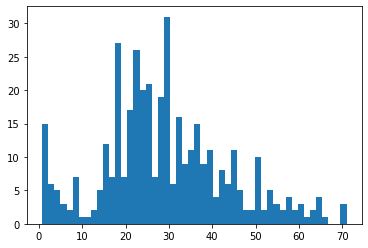

In [8]:
plt.hist(df_train["Age"], bins=50)

In [9]:
df_train["Age"] = df_train["Age"].fillna(df_train["Age"].mean() + np.random.randn() * df_train["Age"].std())

In [10]:
df_train = df_train.drop(["Cabin", "Name"], axis=1)

In [11]:
df_train["Embarked"].value_counts()

S    362
C     92
Q     45
Name: Embarked, dtype: int64

In [12]:
df_train["Embarked"] = df_train["Embarked"].fillna('S')

In [13]:
df_train.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
df_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,female,38.000000,1,0,PC 17599,71.2833,C
2,3,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,female,35.000000,1,0,113803,53.1000,S
4,5,3,male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
495,496,3,male,21.222164,0,0,2627,14.4583,C
496,497,1,female,54.000000,1,0,36947,78.2667,C
497,498,3,male,21.222164,0,0,C.A. 6212,15.1000,S
498,499,1,female,25.000000,1,2,113781,151.5500,S


In [15]:
sex_assign_dict = {'male':0, 'female':1}
df_train = df_train.replace({'Sex': sex_assign_dict})


In [16]:
df_train["Ticket"].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [17]:
pd.factorize(df_train["Ticket"])

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,   7,  24,
         25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
         38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
         51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
         64,  65,  66,  67,  68,  69,  58,  70,  71,  72,  73,  74,  75,
         76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  26,  86,  87,
         88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
        101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
         40, 114,  13,  70, 115,   9, 116,  99,  38, 117, 118, 119, 120,
        121, 122, 123, 124, 125, 126, 127,   3, 128, 129, 130, 131, 132,
        133, 134, 135, 136,  84, 137, 138, 139, 140, 141, 142, 143, 144,
        145, 146, 147, 148, 149, 150, 151, 152,  49, 153, 154,  62, 155,
         72, 156,  16,   8, 157, 158, 159, 160, 161

In [18]:
df_train["Ticket"] = df_train["Ticket"].factorize()[0]

In [19]:
df_train["Ticket"]

0        0
1        1
2        2
3        3
4        4
      ... 
495    111
496    416
497    417
498    266
499    418
Name: Ticket, Length: 500, dtype: int64

In [20]:
df_train["Embarked"] = df_train["Embarked"].factorize()[0]

In [21]:
df_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,0,22.0,1,0,0,7.2500,0
1,2,1,1,38.0,1,0,1,71.2833,1
2,3,3,1,26.0,0,0,2,7.9250,0
3,4,1,1,35.0,1,0,3,53.1000,0
4,5,3,0,35.0,0,0,4,8.0500,0


In [22]:
df_train = (df_train - df_train.mean())/df_train.std()

In [23]:
df_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,-1.726861,0.814301,-0.765589,-0.415759,0.369224,-0.487012,-1.605072,-0.515321,-0.566865
1,-1.719939,-1.602022,1.303571,0.777168,0.369224,-0.487012,-1.596845,0.829748,0.990456
2,-1.713018,0.814301,1.303571,-0.117527,-0.497499,-0.487012,-1.588618,-0.501142,-0.566865
3,-1.706097,-1.602022,1.303571,0.553494,0.369224,-0.487012,-1.580392,0.447794,-0.566865
4,-1.699176,0.814301,-0.765589,0.553494,-0.497499,-0.487012,-1.572165,-0.498516,-0.566865


In [24]:
df_train.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,500.000000,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,500.000000,5.000000e+02,5.000000e+02
mean,0.000000,-7.815970e-17,7.815970e-17,8.881784e-17,7.105427e-17,-1.953993e-17,0.000000,4.973799e-17,6.572520e-17
std,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00
min,-1.726861,-1.602022e+00,-7.655893e-01,-2.000116e+00,-4.974993e-01,-4.870124e-01,-1.605072,-6.676125e-01,-5.668650e-01
25%,-0.863430,-3.938605e-01,-7.655893e-01,-4.737530e-01,-4.974993e-01,-4.870124e-01,-0.899642,-5.011418e-01,-5.668650e-01
50%,0.000000,8.143006e-01,-7.655893e-01,-2.666432e-01,-4.974993e-01,-4.870124e-01,-0.054361,-3.639478e-01,-5.668650e-01
75%,0.863430,8.143006e-01,1.303571e+00,5.534943e-01,3.692242e-01,-4.870124e-01,0.840279,-3.595206e-02,9.904564e-01
max,1.726861,8.143006e-01,1.303571e+00,3.237581e+00,6.436289e+00,5.921045e+00,1.833639,1.009426e+01,2.547778e+00


In [25]:
df_val.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
501,502,0,3,"Canavan, Miss. Mary",female,21.0,0,0,364846,7.7500,NaN,Q
502,503,0,3,"O'Sullivan, Miss. Bridget Mary",female,NaN,0,0,330909,7.6292,NaN,Q
503,504,0,3,"Laitinen, Miss. Kristina Sofia",female,37.0,0,0,4135,9.5875,NaN,S
504,505,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.5000,B79,S
505,506,0,1,"Penasco y Castellana, Mr. Victor de Satode",male,18.0,1,0,PC 17758,108.9000,C65,C


In [26]:
df_val = df_val.drop(["Cabin","Name"], axis = 1)

In [27]:
df_val["Age"] = df_val["Age"].fillna(df_val["Age"].mean() + np.random.randn() * df_val["Age"].std())
df_val["Embarked"] = df_val["Embarked"].fillna('S')
df_val = df_val.replace({'Sex': sex_assign_dict})
df_val["Ticket"] = df_val["Ticket"].factorize()[0]
df_val["Embarked"] = df_val["Embarked"].factorize()[0]
df_val_survived = df_val["Survived"]
df_val = df_val.drop("Survived", axis =1 )
df_val = (df_val - df_val.mean())/df_val.std()

In [28]:
df_val.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
501,-1.725399,0.844103,1.420587,-0.870495,-0.444448,-0.458018,-1.651371,-0.478602,-2.162249
502,-1.716528,0.844103,1.420587,1.091493,-0.444448,-0.458018,-1.641002,-0.480909,-2.162249
503,-1.707657,0.844103,1.420587,0.172843,-0.444448,-0.458018,-1.630632,-0.443502,-0.219214
504,-1.698786,-1.515754,1.420587,-1.196538,-0.444448,-0.458018,-1.620263,1.025658,-0.219214
505,-1.689915,-1.515754,-0.702129,-1.066121,0.523902,-0.458018,-1.609894,1.453536,1.723820


In [29]:
df_val_survived

501    0
502    0
503    0
504    1
505    0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 390, dtype: int64

In [30]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

class Dataset(Dataset):
    def __init__(self, x, y) :
        self.x_data = torch.Tensor(x.to_numpy());
        self.y_data = torch.Tensor(y.to_numpy()).reshape(-1,1);
    
    def __len__(self) :
        return len(self.x_data)
    
    def __getitem__(self, idx) :
        x = torch.FloatTensor(self.x_data[idx])
        #print("now shape of y_data is : " , np.shape(self.y_data))
        y = torch.FloatTensor(self.y_data[idx])
        return x, y


In [31]:
train_dataset = Dataset(df_train, df_train_survived)
train_dataloader = DataLoader(train_dataset, batch_size=1, shuffle=True)

val_dataset = Dataset(df_val, df_val_survived)
val_dataloader = DataLoader(val_dataset, batch_size = 1, shuffle= True)

In [32]:
print( np.shape(torch.Tensor(df_train.to_numpy())),
np.shape(torch.Tensor(df_train_survived.to_numpy())))

torch.Size([500, 9]) torch.Size([500])


In [33]:
from torch import nn

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(9, 20),
            nn.ReLU(),
            nn.Linear(20,20),
            nn.ReLU(),
            nn.Linear(20,1)
        )
        
    def forward(self, x) :
        x = self.flatten(x)
        y = self.linear_relu_stack(x)
        #print(y.type(), np.shape(y))
        #if( y > 0.5) : y = torch.ones(1);
        #else : y = torch.zeros(1);
        return y.sum().reshape(-1,1)

model = NeuralNetwork()
print(model)

NeuralNetwork(
  (flatten): Flatten()
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=9, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=1, bias=True)
  )
)


In [34]:
loss_fn = nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr= 1e-3)

In [35]:
def train(dataloader, model, loss_fn, optimizer) :
    size = len(dataloader.dataset)
    for batch, (X, y), in enumerate(dataloader):
        #print(np.shape(X), "model forward result: ",np.shape(model.forward(X)))
        #print("y shape: ", np.shape(y))
        pred = model.forward(X)
        loss =loss_fn(pred, y)
        train_loss_log.append(loss);
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if(batch%100==0) :
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f} [{current:>5d}/{size:>5d}]")
            


In [36]:
def test(dataloader, model, loss_fn) :
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    val_loss, correct =0, 0
    with torch.no_grad():
        for X, y in dataloader:
            pred = model.forward(X)
            if(pred < 0.5) : ans = 0;
            else : ans = 1;
            #print("i predicted to ", pred," to ", ans, " and answer was ", y)
            val_loss += loss_fn(pred, y).item()
            correct += (ans==y).type(torch.float).sum().item()
    val_loss /= num_batches
    correct /= size
    print(f"val Error : \n Accuracy: { (100*correct) : >0.1f}% Avg loss : {val_loss :>8f}\n")

In [37]:
epochs= 20
train_loss_log = []

for t in range(epochs) :
    print(f"Epoch {t+1}\n-------------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(val_dataloader, model, loss_fn)
    
print("Done!")

Epoch 1
-------------------------------------
loss: 0.738340 [    0/  500]
loss: 0.722278 [  100/  500]
loss: 0.071388 [  200/  500]
loss: 0.519363 [  300/  500]
loss: 0.385101 [  400/  500]
val Error : 
 Accuracy: 66.4% Avg loss : 0.209293

Epoch 2
-------------------------------------
loss: 0.209851 [    0/  500]
loss: 0.347710 [  100/  500]
loss: 0.292186 [  200/  500]
loss: 0.103746 [  300/  500]
loss: 0.097143 [  400/  500]
val Error : 
 Accuracy: 70.5% Avg loss : 0.195191

Epoch 3
-------------------------------------
loss: 0.127129 [    0/  500]
loss: 0.323346 [  100/  500]
loss: 0.318148 [  200/  500]
loss: 0.078393 [  300/  500]
loss: 0.135858 [  400/  500]
val Error : 
 Accuracy: 74.6% Avg loss : 0.184099

Epoch 4
-------------------------------------
loss: 0.049819 [    0/  500]
loss: 0.338425 [  100/  500]
loss: 0.504455 [  200/  500]
loss: 0.104873 [  300/  500]
loss: 0.043196 [  400/  500]
val Error : 
 Accuracy: 76.9% Avg loss : 0.174416

Epoch 5
------------------------

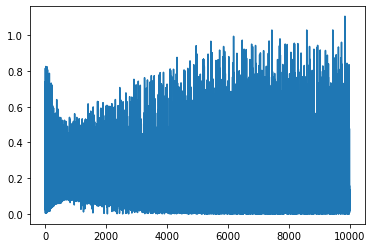

In [38]:
plt.plot(train_loss_log)
plt.show()

In [39]:
class NeuralNetwork2(nn.Module):
    def __init__(self):
        super(NeuralNetwork2, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(9, 20),
            nn.ReLU(),
            nn.Linear(20,7),
            nn.ReLU(),
            nn.Linear(7,10),
            nn.ReLU(),
            nn.Linear(10,20),
            nn.ReLU(),
            nn.Linear(20,1)
        )
        
    def forward(self, x) :
        x = self.flatten(x)
        y = self.linear_relu_stack(x)
        #print(y.type(), np.shape(y))
        #if( y > 0.5) : y = torch.ones(1);
        #else : y = torch.zeros(1);
        return y.sum().reshape(-1,1)

model = NeuralNetwork2()
print(model)

loss_fn = nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr= 1e-3)


NeuralNetwork2(
  (flatten): Flatten()
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=9, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=7, bias=True)
    (3): ReLU()
    (4): Linear(in_features=7, out_features=10, bias=True)
    (5): ReLU()
    (6): Linear(in_features=10, out_features=20, bias=True)
    (7): ReLU()
    (8): Linear(in_features=20, out_features=1, bias=True)
  )
)


In [40]:
epochs= 50
train_loss_log = []
for t in range(epochs) :
    print(f"Epoch {t+1}\n-------------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(val_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------------
loss: 1.292135 [    0/  500]
loss: 0.997044 [  100/  500]
loss: 0.006925 [  200/  500]
loss: 0.729495 [  300/  500]
loss: 0.620903 [  400/  500]
val Error : 
 Accuracy: 61.8% Avg loss : 0.248118

Epoch 2
-------------------------------------
loss: 0.071653 [    0/  500]
loss: 0.512496 [  100/  500]
loss: 0.095535 [  200/  500]
loss: 0.404821 [  300/  500]
loss: 0.121195 [  400/  500]
val Error : 
 Accuracy: 61.8% Avg loss : 0.231548

Epoch 3
-------------------------------------
loss: 0.388806 [    0/  500]
loss: 0.377354 [  100/  500]
loss: 0.134877 [  200/  500]
loss: 0.364707 [  300/  500]
loss: 0.123430 [  400/  500]
val Error : 
 Accuracy: 61.8% Avg loss : 0.229997

Epoch 4
-------------------------------------
loss: 0.151727 [    0/  500]
loss: 0.384373 [  100/  500]
loss: 0.141677 [  200/  500]
loss: 0.157109 [  300/  500]
loss: 0.349499 [  400/  500]
val Error : 
 Accuracy: 61.8% Avg loss : 0.229008

Epoch 5
------------------------

val Error : 
 Accuracy: 79.5% Avg loss : 0.137971

Epoch 35
-------------------------------------
loss: 0.022341 [    0/  500]
loss: 0.023446 [  100/  500]
loss: 0.007899 [  200/  500]
loss: 0.100704 [  300/  500]
loss: 0.124360 [  400/  500]
val Error : 
 Accuracy: 79.7% Avg loss : 0.137120

Epoch 36
-------------------------------------
loss: 0.015786 [    0/  500]
loss: 0.019857 [  100/  500]
loss: 0.605395 [  200/  500]
loss: 0.712536 [  300/  500]
loss: 0.122216 [  400/  500]
val Error : 
 Accuracy: 79.7% Avg loss : 0.137130

Epoch 37
-------------------------------------
loss: 0.231296 [    0/  500]
loss: 0.018713 [  100/  500]
loss: 0.019685 [  200/  500]
loss: 0.031546 [  300/  500]
loss: 0.826566 [  400/  500]
val Error : 
 Accuracy: 79.7% Avg loss : 0.136874

Epoch 38
-------------------------------------
loss: 0.011176 [    0/  500]
loss: 0.249595 [  100/  500]
loss: 0.007889 [  200/  500]
loss: 0.147509 [  300/  500]
loss: 0.049480 [  400/  500]
val Error : 
 Accuracy: 80.0

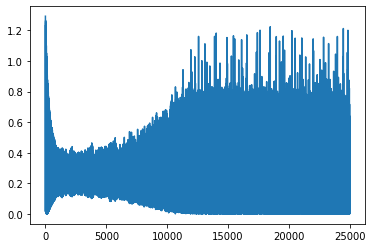

In [41]:
plt.plot(train_loss_log)
plt.show()

In [117]:
df_test = pd.read_csv('test.csv')

In [118]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [119]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [120]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [121]:
df_test = df_test.drop(["Cabin","Name"], axis = 1)
df_test["Age"] = df_test["Age"].fillna(df_test["Age"].mean() + np.random.randn() * df_test["Age"].std())
df_test["Embarked"] = df_test["Embarked"].fillna('S')
df_test = df_test.replace({'Sex': sex_assign_dict})
df_test["Ticket"] = df_test["Ticket"].factorize()[0]
df_test["Embarked"] = df_test["Embarked"].factorize()[0]
df_test_passengerid = df_test["PassengerId"]
#df_test.drop(["PassengerId"], axis=1)
df_test = (df_test- df_test.mean())/df_test.std()
#df_test = pd.concat([df_test_passengerid, df_test])

In [122]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,-1.725844,0.872436,-0.755024,0.425533,-0.498872,-0.399769,-1.676935,-0.497213,-1.953600
1,-1.717567,0.872436,1.321292,1.396668,0.616254,-0.399769,-1.667270,-0.512045,-0.230805
2,-1.709289,-0.315441,-0.755024,2.562030,-0.498872,-0.399769,-1.657604,-0.463974,-1.953600
3,-1.701012,0.872436,-0.755024,-0.157147,-0.498872,-0.399769,-1.647939,-0.482308,-0.230805
4,-1.692734,0.872436,1.321292,-0.545601,0.616254,0.619154,-1.638274,-0.417469,-0.230805


In [123]:
def test(dataloader, model, loss_fn) :
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    val_loss, correct =0, 0
    with torch.no_grad():
        for X, y in dataloader:
            pred = model.forward(X)
            if(pred < 0.5) : ans = 0;
            else : ans = 1;
            #print("i predicted to ", pred," to ", ans, " and answer was ", y)
            
    val_loss /= num_batches
    correct /= size
    print(f"val Error : \n Accuracy: { (100*correct) : >0.1f}% Avg loss : {val_loss :>8f}\n")

In [124]:
test_X = torch.Tensor(df_test.to_numpy())
print(np.shape(test_X))

torch.Size([418, 9])


In [150]:
current_id = 891; 
df_ans = pd.DataFrame(columns=["PassengerId", "Survived"])

for data in test_X :
    pred = model.forward(data.reshape(1,-1))
    if (pred < 0.5) :  ans = 0;
    else : ans = 1;
    current_id +=1
    df_ans=df_ans.append({'PassengerId':current_id, 'Survived':ans}, ignore_index=True)

In [151]:
df_ans

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [153]:
df_ans.to_csv("ans.csv", index= False)